In [1]:
from sklearn.feature_extraction.text import CountVectorizer

v=CountVectorizer(ngram_range=(1,3))
v.fit(["Thor Hathodawala is looking for a job"])
v.vocabulary_

{'thor': 12,
 'hathodawala': 2,
 'is': 5,
 'looking': 9,
 'for': 0,
 'job': 8,
 'thor hathodawala': 13,
 'hathodawala is': 3,
 'is looking': 6,
 'looking for': 10,
 'for job': 1,
 'thor hathodawala is': 14,
 'hathodawala is looking': 4,
 'is looking for': 7,
 'looking for job': 11}

In [6]:
corpus = [
    "Thor ate pizza",
    "Loki is tall",
    "Loki is eating pizza"
]

In [2]:
import spacy

# /load english lang model & create nip obj from it

nlp = spacy.load("en_core_web_sm")

def preprocess(text):
    doc = nlp(text)


    filtered_tokens = []


    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        filtered_tokens.append(token.lemma_)
    
    return " ".join(filtered_tokens)  

In [3]:
preprocess("Thor ate pizza")

'thor eat pizza'

In [4]:
preprocess("Loki is eating pizza")

'Loki eat pizza'

In [7]:
corpus_processed = [
    preprocess(text) for text in corpus
]
corpus_processed

['thor eat pizza', 'Loki tall', 'Loki eat pizza']

In [8]:

v = CountVectorizer(ngram_range=(1,2))
v.fit(corpus_processed)
v.vocabulary_

{'thor': 7,
 'eat': 0,
 'pizza': 5,
 'thor eat': 8,
 'eat pizza': 1,
 'loki': 2,
 'tall': 6,
 'loki tall': 4,
 'loki eat': 3}

generate bag of n grams vector for few sample doc


In [10]:

v.transform(["Thor eat pizza"]).toarray()

array([[1, 1, 0, 0, 0, 1, 0, 1, 1]])


Let's take a document that has out of vocabulary (OOV) term and see how bag of ngram generates vector out of it


In [11]:

v.transform(["Hulk eat pizza"]).toarray()

array([[1, 1, 0, 0, 0, 1, 0, 0, 0]])

News Category Classification Problem

In [14]:
import pandas as pd

df = pd.read_json('News_Category_Dataset_v3.json', lines=True)
print(df.shape)

df.head()

(209527, 6)


,link,headline,category,short_description,authors,date
0,https://www.huffpost.com/entry/covid-boosters-...,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,Health experts said it is too early to predict...,"Carla K. Johnson, AP",2022-09-23
1,https://www.huffpost.com/entry/american-airlin...,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,He was subdued by passengers and crew when he ...,Mary Papenfuss,2022-09-23
2,https://www.huffpost.com/entry/funniest-tweets...,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY,"""Until you have a dog you don't understand wha...",Elyse Wanshel,2022-09-23
3,https://www.huffpost.com/entry/funniest-parent...,The Funniest Tweets From Parents This Week (Se...,PARENTING,"""Accidentally put grown-up toothpaste on my to...",Caroline Bologna,2022-09-23
4,https://www.huffpost.com/entry/amy-cooper-lose...,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS,Amy Cooper accused investment firm Franklin Te...,Nina Golgowski,2022-09-22


In [15]:

df.category.value_counts()

category
POLITICS          35602
WELLNESS          17945
ENTERTAINMENT     17362
TRAVEL             9900
STYLE & BEAUTY     9814
PARENTING          8791
HEALTHY LIVING     6694
QUEER VOICES       6347
FOOD & DRINK       6340
BUSINESS           5992
COMEDY             5400
SPORTS             5077
BLACK VOICES       4583
HOME & LIVING      4320
PARENTS            3955
THE WORLDPOST      3664
WEDDINGS           3653
WOMEN              3572
CRIME              3562
IMPACT             3484
DIVORCE            3426
WORLD NEWS         3299
MEDIA              2944
WEIRD NEWS         2777
GREEN              2622
WORLDPOST          2579
RELIGION           2577
STYLE              2254
SCIENCE            2206
TECH               2104
TASTE              2096
MONEY              1756
ARTS               1509
ENVIRONMENT        1444
FIFTY              1401
GOOD NEWS          1398
U.S. NEWS          1377
ARTS & CULTURE     1339
COLLEGE            1144
LATINO VOICES      1130
CULTURE & ARTS     1074
EDUCATI

handling class imbalance using undersampling

In [16]:
min_samples = 1381 # we have these many SCIENCE articles and SCIENCE is our minority class


df_business = df[df.category=="BUSINESS"].sample(min_samples, random_state=2022)
df_sports = df[df.category=="SPORTS"].sample(min_samples, random_state=2022)
df_crime = df[df.category=="CRIME"].sample(min_samples, random_state=2022)
df_science = df[df.category=="SCIENCE"].sample(min_samples, random_state=2022)

In [17]:

df_balanced = pd.concat([df_business,df_sports,df_crime,df_science],axis=0)
df_balanced.category.value_counts()

category
BUSINESS    1381
SPORTS      1381
CRIME       1381
SCIENCE     1381
Name: count, dtype: int64

In [18]:
target = {'BUSINESS': 0, 'SPORTS': 1, 'CRIME': 2, 'SCIENCE': 3}

df_balanced['category_num'] = df_balanced['category'].map({
    'BUSINESS': 0,
    'SPORTS': 1, 
    'CRIME': 2, 
    'SCIENCE': 3
})
# converting text category to a number

In [19]:

df_balanced.head()

,link,headline,category,short_description,authors,date,category_num
181516,https://www.huffingtonpost.com/entry/entrepren...,Entrepreneurism: Lots of Little Traumas and No...,BUSINESS,"I loved my years in corporate America, which I...","Liz Ryan, Contributor\nSpeaker, writer, sopran...",2012-11-25,0
58552,https://www.huffingtonpost.com/entry/tesla-fas...,Tesla Just Unveiled The Quickest Car You Can A...,BUSINESS,A new battery upgrade extends the range of the...,"Alexandria Sage, Reuters",2016-08-23,0
155102,https://www.huffingtonpost.com/entry/workers-p...,90 Percent Of Employers Tie Workers' Pay To Co...,BUSINESS,Caterpillar will not break any profit records ...,"Reuters, Reuters",2013-09-01,0
71725,https://www.huffingtonpost.com/entry/us-tax-ha...,One Of Ben Carson's Craziest Ideas Is Coming True,BUSINESS,The U.S. is the world's hottest new tax haven.,Ben Walsh,2016-03-26,0
80455,https://www.huffingtonpost.comhttp://www.bloom...,CEO Who Price Gouged HIV Drug Arrested For Sec...,BUSINESS,"A boyish drug company entrepreneur, who rocket...",,2015-12-17,0


Build a model with original text(no pre processing)

In [21]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df_balanced.headline, 
    df_balanced.category_num, 
    test_size=0.2, # 20% samples will go to test dataset
    random_state=2022,
    stratify=df_balanced.category_num
)

In [22]:

print(X_train.shape)
X_train.head()

(4419,)


196434    Space Plane: X-37B Video Shows Air Force Craft...
178136    Cave-Dwelling Plants: Strange Subterranean Net...
102479    Hockey Goalie Commits Humiliating Gaffe In Nat...
37965     Wisconsin Man Accused Of Sending Manifesto To ...
191964    Derek McGlone, Teacher, Tries To Get Out Of Wo...
Name: headline, dtype: object

In [23]:

y_train.value_counts()

category_num
3    1105
2    1105
0    1105
1    1104
Name: count, dtype: int64

In [24]:

y_test.value_counts()

category_num
1    277
0    276
3    276
2    276
Name: count, dtype: int64

Use 1-gram which is nothing but a Bag Of Words (BOW) model

In [25]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

#1. create a pipeline object
clf = Pipeline([
     ('vectorizer_bow', CountVectorizer(ngram_range = (1, 1))),        #using the ngram_range parameter 
     ('Multi NB', MultinomialNB())         
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.83      0.79       276
           1       0.86      0.78      0.82       277
           2       0.84      0.89      0.87       276
           3       0.84      0.79      0.82       276

    accuracy                           0.82      1105
   macro avg       0.83      0.82      0.82      1105
weighted avg       0.83      0.82      0.82      1105



In [26]:

X_test[:5]

79832     Lender Discrimination May Be Pushing Black Chu...
106908    Mars One Candidate Thinks She Has What It Take...
166971               DNA: What Have You Done for Me Lately?
140653                    Choose to Find Her and Mentor Her
111157    Death Of Mentally Ill Woman In Police Custody ...
Name: headline, dtype: object

In [27]:

y_pred[:5]

array([0, 3, 3, 2, 2])

In [28]:
y_test[:5]

79832     0
106908    3
166971    3
140653    0
111157    2
Name: category_num, dtype: int64


Attempt 2 : Use 1-gram and bigrams

In [29]:
#1. create a pipeline object
clf = Pipeline([
    ('vectorizer_1_2_gram', CountVectorizer(ngram_range = (1, 2))),        #using the ngram_range parameter 
     ('Multi NB', MultinomialNB())         
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.81      0.79       276
           1       0.85      0.79      0.82       277
           2       0.84      0.88      0.86       276
           3       0.85      0.82      0.83       276

    accuracy                           0.83      1105
   macro avg       0.83      0.83      0.83      1105
weighted avg       0.83      0.83      0.83      1105




Attempt 3 : Use 1-gram to trigrams

In [30]:
#1. create a pipeline object
clf = Pipeline([
    ('vectorizer_1_3_grams', CountVectorizer(ngram_range = (1, 3))),        #using the ngram_range parameter 
     ('Multi NB', MultinomialNB())         
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.81      0.78       276
           1       0.85      0.79      0.82       277
           2       0.85      0.88      0.86       276
           3       0.84      0.81      0.83       276

    accuracy                           0.82      1105
   macro avg       0.82      0.82      0.82      1105
weighted avg       0.82      0.82      0.82      1105



In [33]:

df_balanced['preprocessed_txt'] = df_balanced['headline'].apply(preprocess) 

In [34]:

df_balanced.head()

,link,headline,category,short_description,authors,date,category_num,preprocessed_txt
181516,https://www.huffingtonpost.com/entry/entrepren...,Entrepreneurism: Lots of Little Traumas and No...,BUSINESS,"I loved my years in corporate America, which I...","Liz Ryan, Contributor\nSpeaker, writer, sopran...",2012-11-25,0,entrepreneurism lot Little Traumas Big Ones
58552,https://www.huffingtonpost.com/entry/tesla-fas...,Tesla Just Unveiled The Quickest Car You Can A...,BUSINESS,A new battery upgrade extends the range of the...,"Alexandria Sage, Reuters",2016-08-23,0,Tesla unveil Quickest Car actually buy
155102,https://www.huffingtonpost.com/entry/workers-p...,90 Percent Of Employers Tie Workers' Pay To Co...,BUSINESS,Caterpillar will not break any profit records ...,"Reuters, Reuters",2013-09-01,0,90 percent Employers tie Workers pay company p...
71725,https://www.huffingtonpost.com/entry/us-tax-ha...,One Of Ben Carson's Craziest Ideas Is Coming True,BUSINESS,The U.S. is the world's hottest new tax haven.,Ben Walsh,2016-03-26,0,Ben Carson Craziest Ideas come true
80455,https://www.huffingtonpost.comhttp://www.bloom...,CEO Who Price Gouged HIV Drug Arrested For Sec...,BUSINESS,"A boyish drug company entrepreneur, who rocket...",,2015-12-17,0,ceo price gouge HIV Drug arrest Securities Fra...


In [35]:

X_train, X_test, y_train, y_test = train_test_split(
    df_balanced.preprocessed_txt, 
    df_balanced.category_num, 
    test_size=0.2, # 20% samples will go to test dataset
    random_state=2022,
    stratify=df_balanced.category_num
)

In [36]:

print(X_train.shape)
X_train.head()

(4419,)


196434    Space Plane x-37b video show Air Force Craft R...
178136    Cave dwelling plant strange subterranean Nettl...
102479    Hockey Goalie commit Humiliating Gaffe Nationa...
37965     Wisconsin Man accuse send Manifesto Trump arre...
191964    Derek McGlone teacher try work lie run kill Gi...
Name: preprocessed_txt, dtype: object

In [37]:

y_train.value_counts()

category_num
3    1105
2    1105
0    1105
1    1104
Name: count, dtype: int64

In [38]:

y_test.value_counts()



category_num
1    277
0    276
3    276
2    276
Name: count, dtype: int64

In [39]:
#1. create a pipeline object
clf = Pipeline([
    ('vectorizer_bow', CountVectorizer(ngram_range = (1, 2))),        #using the ngram_range parameter 
    ('Multi NB', MultinomialNB())
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.76      0.78       276
           1       0.84      0.82      0.83       277
           2       0.81      0.92      0.86       276
           3       0.86      0.81      0.84       276

    accuracy                           0.83      1105
   macro avg       0.83      0.83      0.83      1105
weighted avg       0.83      0.83      0.83      1105



In [40]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[210,  22,  22,  22],
       [ 17, 228,  21,  11],
       [ 12,   8, 253,   3],
       [ 25,  12,  15, 224]])

Text(95.72222222222221, 0.5, 'Truth')

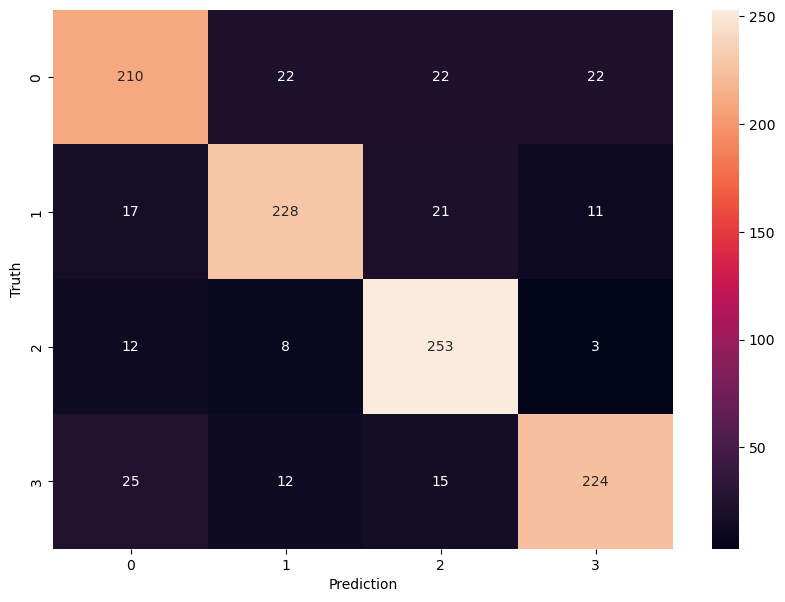

In [41]:

from matplotlib import pyplot as plt
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')